## Workshop on Practical Data Analysis in Earth and Planetary Science. 


every Monday at 4pm (CEST), at the Center for Planetary Habitability (PHAB), Wegener's room (1st floor, ZEB-building) 

join online https://uio.zoom.us/j/61896722660
dropbox https://www.dropbox.com/scl/fo/ouxmaiunaxjncmjvzjjjp/h?rlkey=mco9ra8fbygwax9oroglfesw0&dl=0
github https://github.com/4minakov/practical-data

### Seminar 4 - Part 2. Natural gamma ray spectroscopy from IODP core data


In this workshop, we will are going to infer concentrations of K, U, Th in a sediment core sample using natural gamma ray spectroscopy data and the least squares method


#### Least squares method

Let's start with a simple system of 3 equations and 2 unknowns. 
Geometrically, this problem is equivalent to the line (or curve) fitting

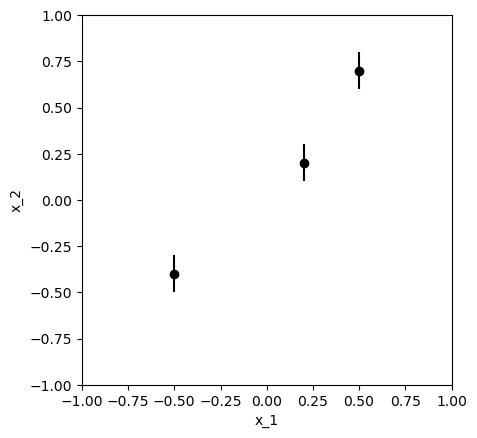

In [13]:
import matplotlib.pyplot as plt

x1 = [-0.5, 0.5, 0.2]
x2 = [-0.4, 0.7, 0.2]

x2std = 0.1 #standard error

plt.figure(1)
plt.clf()
plt.plot(x1, x2, 'ok')
plt.errorbar(x1, x2, yerr=x2std, fmt='.k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


The solution of this system of equations provides us the relation between $x_1$ and $x_2$, in this case, a linear relation. 

\begin{equation}
\left\{
\begin{aligned}
a_1 x_1(1) + a_2 x_2(1) + a_3 &= 0 \\
a_1 x_1(2) + a_2 x_2(2) + a_3 &= 0 \\
a_1 x_1(3) + a_2 x_2(3) + a_3 &= 0
\end{aligned}
\right.
\end{equation}

The slope and intercept coefficients describung a strait line are

$c(1) = a_1/a_2 , \\
 c(2) = a_3/a_2$

Using this new variables and writing equations in matrix form

$ \begin{bmatrix}
    x_1(1) & 1  \\
    x_1(2) & 1  \\
    x_1(3) & 1  \\
\end{bmatrix} \times \begin{bmatrix}
    c_1 \\
    c_2 \\
\end{bmatrix} = \begin{bmatrix}
    x_2(1) \\
    x_2(2) \\
    x_2(3) \\
\end{bmatrix}$

We cannot solve this system exactly since we have more equations than unknowns, so that we are given with multiple conflicting evidence. The classical resolution of this problem is to search a solution with a minimum total squared error between data and predictions or minimum-norm solution. 

The squared misfit is

$F = (x_2 - A c)^T (x_2 - A c) \rightarrow min$

The minimum of $F$ with respect to $c$ is found by equating the derivative to zero

$\frac{\partial F}{\partial c} = 0 $

Taking the derivative, we find the solution

$ -2 A^{T} \left(x_2 - A c\right) = 0 \\
A^{T} x_2 - A^{T} A c = 0 \\
c = \left(A^{T}A\right)^{-1} A^{T} x_2 $



This solution is unique.



[1.05696203 0.09620253]
[[ 0.18987342 -0.01265823]
 [-0.01265823  0.03417722]]


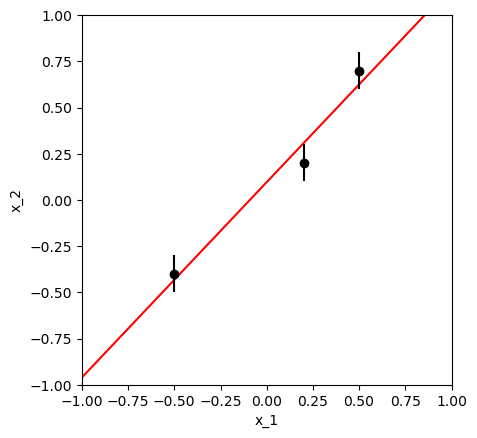

In [18]:
import numpy as np

# Create the matrix A by concatenating x1 with an array of ones
A = np.column_stack((x1, np.ones_like(x1)))
# minimum norm solution
c = np.linalg.inv(A.T @ A) @ A.T @ x2
# covariance
cv = np.linalg.inv(A.T @ A) * x2std 
print(c)
print(cv)
p1 = np.linspace(-1, 1, 10)
# Calculate xp using the linear equation
xp = p1 * c[0] + c[1]

plt.figure(2)
plt.clf()
plt.plot(p1,xp,'r')
plt.plot(x1, x2, 'ok')
plt.errorbar(x1, x2, yerr=x2std, fmt='.k')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


$\textbf{Exercise}$: 

Try to run an example for fitting a surface to a group of points which can be found  the workshop sandbox folder

We can also utilize the entire spectrum and solve a linear system of equation using least squares method:
\begin{equation}
\begin{array}{lcr} 
b_1^j &=& S_K^{1j} w_K C_K  + S_U^{1j} w_U C_U + S_{Th}^{1j} w_{Th} C_{Th} + S_{bg}^{1j} w_{bg} C_{bg} \\
b_2^j &=& S_K^{2j} w_K C_K  + S_U^{2j} w_U C_U + S_{Th}^{2j} w_{Th} C_{Th} + S_{bg}^{2j} w_{bg} C_{bg} \\
b_3^j &=& S_K^{3j} w_K C_K  + S_U^{3j} w_U C_U + S_{Th}^{3j} w_{Th} C_{Th} + S_{bg}^{3j} w_{bg} C_{bg} \\
\cdots \\
b_N^j &=& S_K^{Nj} w_K C_K  + S_U^{Nj} w_U C_U + S_{Th}^{Nj} w_{Th} C_{Th} + S_{bg}^{Nj} w_{bg} C_{bg}
\end{array}
\end{equation}

where $b$ is the total counts per second measured on the core sample at detector $j$, $S$ are standard spectra in counts per second, $N$ is the number of channels (energy windows) at each detector, e.g. $N = 1024$, $w$ are normalization coefficients.


Below is a Matlab code that illustrating the least squares method to calculate the elemental abundances in the core sample from NGR measurements   

In [9]:
w = [5 100 100 1].^(-1) ./rho_stnd;% concentration weights
w = diag(w);
t_data = 300; % data measurement time (s)
t_stnd = 21600; % spectra measurement time (s)
detector = 5; % detector ID = (1:8)

for j =1:ndata % loop over data points (distance from the top of the core section)
    %make system matrix using K-U-Th standards spectra (in total counts)
    A = [S_K(:,detector) S_U(:,detector) S_Th(:,detector) S_bg(:,detector)]; 
    A = A*(w*rho_smpl); % normalize the system matrix
    A = A / t_stnd; % standard spectra in counts per second 
    b = data(:,j) / t_data; % data spectrum in counts per second  
    x = A\b ; % solving the linear system of equations
    % estimate covariance 
    H  = (A'*A)\A'; % Jacobian
    cv = H*H'*var(b); % covariance matrix
    v  = diag(cv); % variance estimate
    % calculate residuals 
    b1 = A*x; % estimated spectrum
    res = rms(b1-b);
end
        

SyntaxError: invalid syntax (3586720360.py, line 1)